['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
dict_keys(['greedy-adaptive-ppr-joint', 'greedy-adaptive-ppr-joint-category', 'greedy-adaptive-ppr-joint-category_company_decade_movie_person', 'greedy-adaptive-ppr-joint-company', 'greedy-adaptive-ppr-joint-decade', 'greedy-adaptive-ppr-joint-knowdontknow', 'greedy-adaptive-ppr-joint-mixed', 'greedy-adaptive-ppr-joint-person', 'greedy-adaptive-ppr-joint-rec', 'greedy-adaptive-ppr-joint-reorder-div', 'greedy-adaptive-ppr-joint-reorder-hr', 'greedy-adaptive-ppr-joint-reorder-mixed', 'greedy-adaptive-ppr-joint-reorder-ser', 'greedy-adaptive-ppr-joint-sub

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


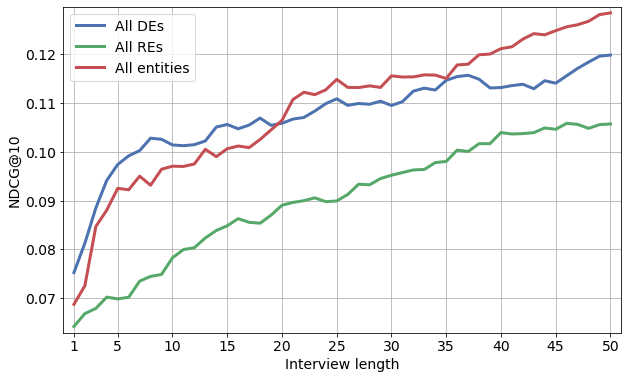

In [2]:
from requests import get
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

font = {'family' : 'normal',
        'size'   : 14}

plt.rc('font', **font)
plt.style.use('seaborn-deep')
# sns.set_palette(sns.color_palette("deep", 10))
print(plt.style.available)
metric = 'ndcg'
cutoff = '10'
n_questions = 50
experiment = 'equal'
xs = np.arange(n_questions) + 1

data = get(f'http://localhost:5000/spectate/results/{experiment}/{metric}/{cutoff}').json()

print(data.keys())

model_values = dict()
name_map = {
    '': 'All DEs',
    '-rec': 'All REs',
    '-category': 'Categories',
    '-decade': 'Decades',
    '-category_company_decade_movie_person': 'All entities',
    '-person': 'People',
    '-company': 'Companies'
}

allowed = ['greedy-adaptive-ppr-joint', 'greedy-adaptive-ppr-joint-rec', 'greedy-adaptive-ppr-joint-category_company_decade_movie_person']
data = {k: v for k, v in data.items() if k in allowed}
for model in data:
    alias = name_map.get(model.replace('greedy-adaptive-ppr-joint', ''))
    print(model)
    model_values[alias] = [np.mean(data[model][x - 1]) for x in xs]

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.5

for i, model in enumerate(sorted(model_values)):
    values = model_values.get(model)
    
    plt.plot(xs, model_values.get(model), label=model, linewidth=3, color=f'C{i}')

plt.xticks([1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.ylabel(f'{metric.upper()}@{cutoff}')
plt.grid()
plt.legend()#loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Interview length')
plt.margins(0.02,)
plt.savefig('output/type_comparison.pdf', bbox_inches='tight')
plt.show()

print(model_values)
